<a href="https://colab.research.google.com/github/valentinedum/room_occupancy_estimation/blob/main/notebooks/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Avant de commencer: Faire un raccourci du drive partagé dans le drive personnel pour y accéder dans google colab.

In [16]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


On récupère la dataset

In [17]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import sys

from pandas.plotting import scatter_matrix

csv_path = "/content/drive/MyDrive/Projet MAIA 12 - Room Occupancy Estimation/Occupancy_Estimation.csv"
df = pd.read_csv(csv_path)

# Afficher les premières lignes du dataset
df.head()


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [18]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

Pas de valeurs manquantes, mais types objets pour date/heure.

In [32]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


Il y a une présence d’outliers marqués (écarts importants entre percentiles).

In [20]:
df.shape

(10129, 19)

In [34]:
df.duplicated().sum()

np.int64(0)

On n'a pas des lignes dupliquer

<Axes: >

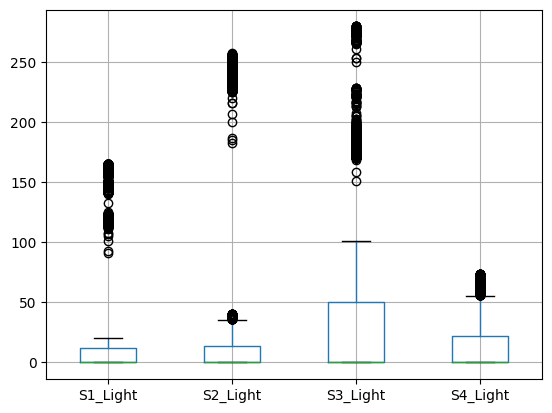

In [21]:
df.boxplot(column=['S1_Light', 'S2_Light', 'S3_Light' , 'S4_Light' ])

Fortes valeurs extrêmes possibles.

<Axes: >

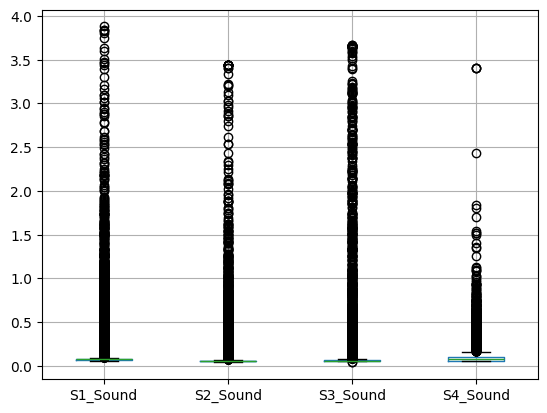

In [22]:
df.boxplot(column=['S1_Sound', 'S2_Sound', 'S3_Sound' , 'S4_Sound' ])

<Axes: >

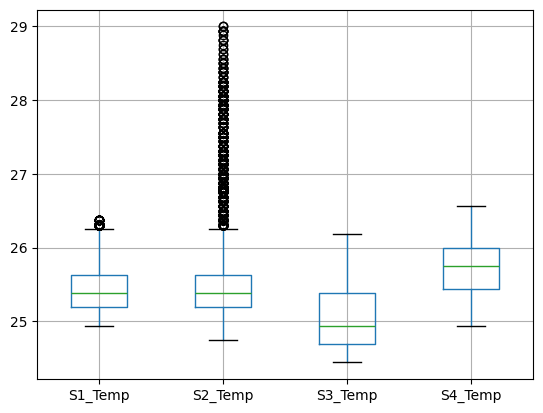

In [23]:
df.boxplot(column=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp'])

Moins d’outliers que pour la lumière/son, mais quelques valeurs aberrantes.

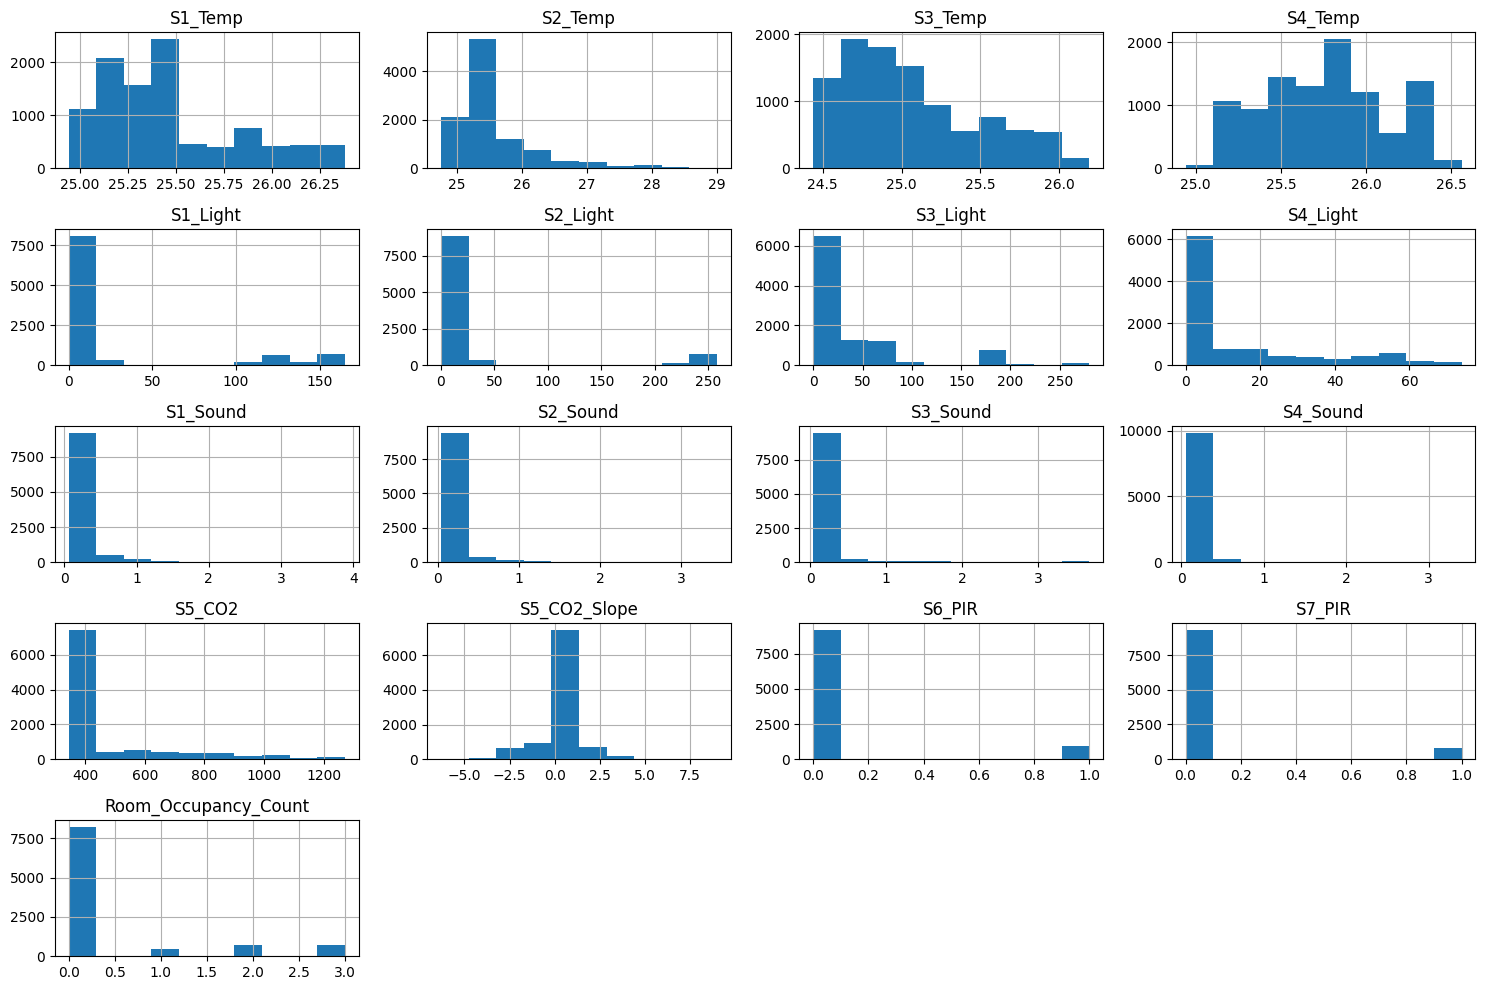

In [24]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

Certaines variables (ex. S5_CO2) ont une distribution décalée à gauche.

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

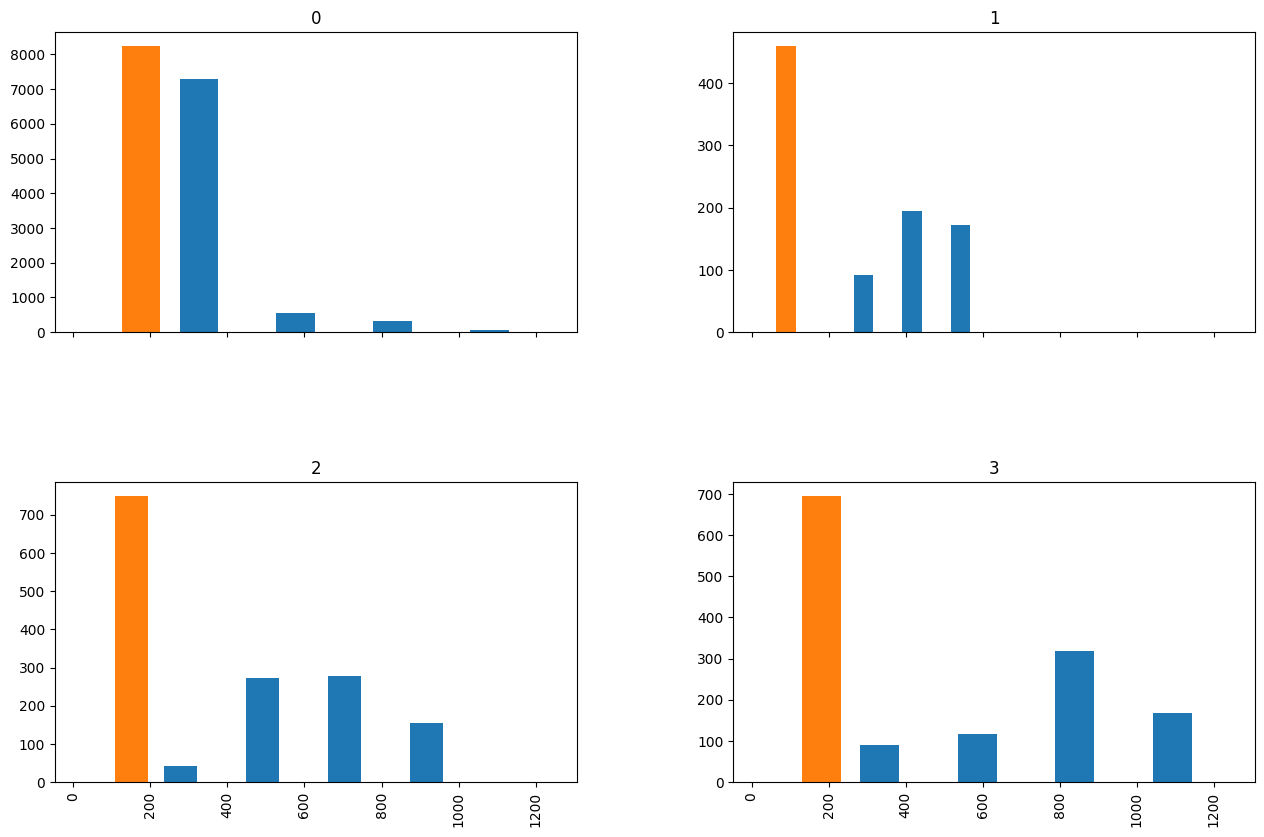

In [25]:
# sharex imposes all the plots to have the same x range
# (otherwise visual comparison is different).
df[['S5_CO2', 'Room_Occupancy_Count']].hist(figsize=(15,10), by='Room_Occupancy_Count',
                                    sharex=True, bins = 5)

la concentration de CO₂ diffère selon l’occupation. Elle augmente avec l'augmentation du room occupancy (présence des valeurs entre 1000 et 1200 pour occupancy 3)

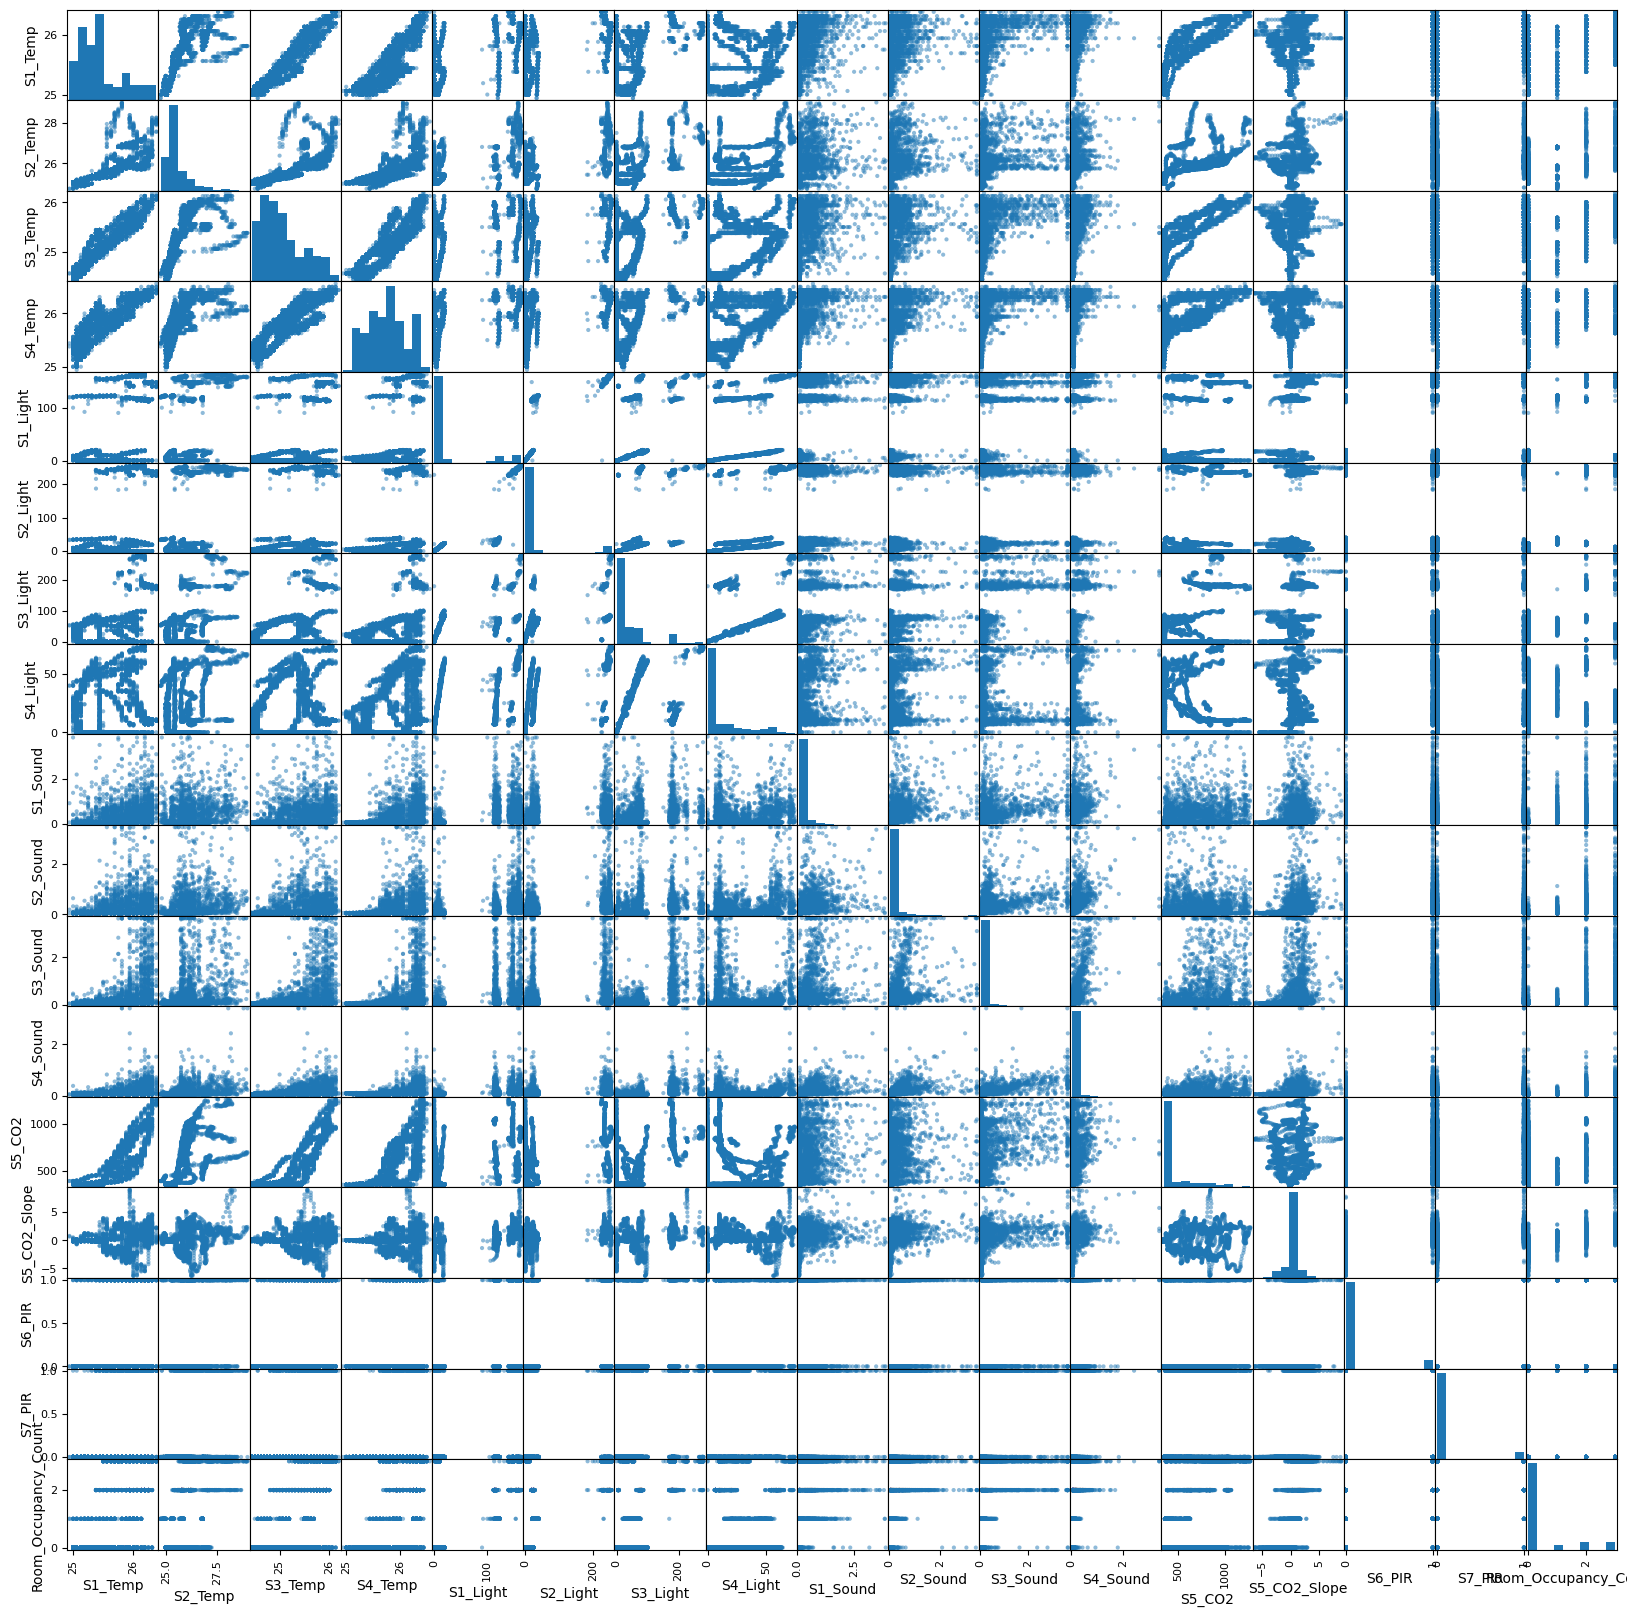

In [26]:
sm = scatter_matrix(df,figsize=(20,20))

plt.show()

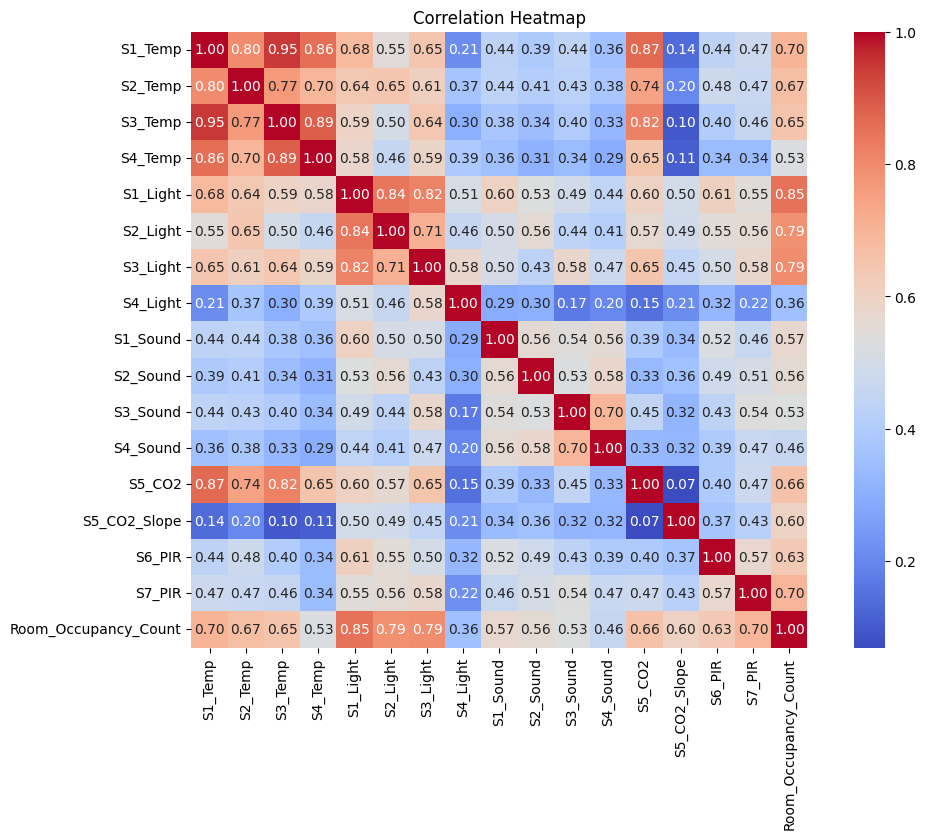

In [27]:
import seaborn as sns

plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)

plt.title("Correlation Heatmap")
plt.show()


In [28]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization

--2025-05-15 07:58:37--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.72K  --.-KB/s    in 0s      

2025-05-15 07:58:37 (103 MB/s) - ‘visualization.py’ saved [13023/13023]



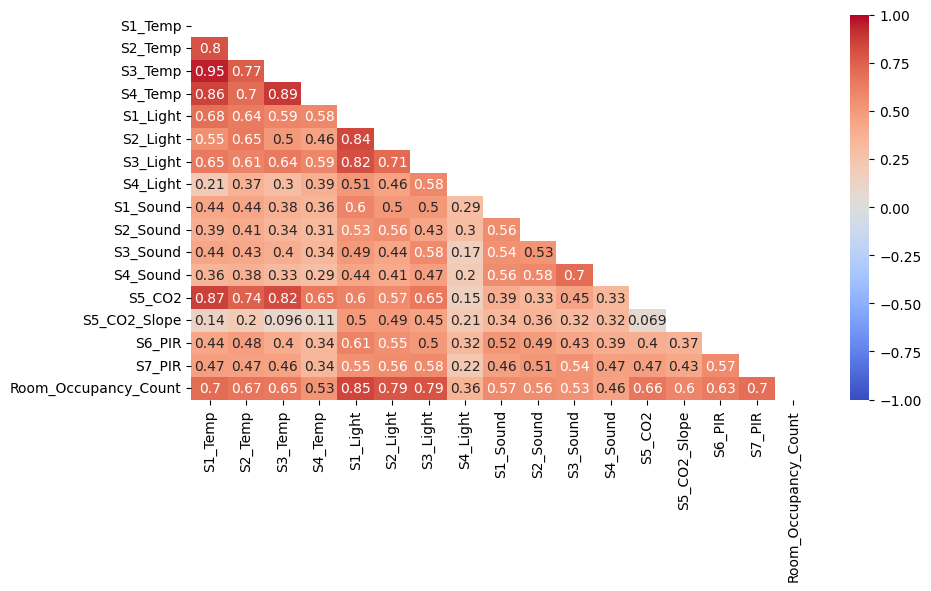

In [29]:
visualization.plot_corr(df.iloc[: , 2:], width=10, height=5,
                        print_value=True)

In [30]:
# From the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

--2025-05-15 07:59:00--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2593 (2.5K) [text/plain]
Saving to: ‘feature_engineering.py’

feature_engineering 100%[===================>]   2.53K  --.-KB/s    in 0s      

2025-05-15 07:59:00 (28.1 MB/s) - ‘feature_engineering.py’ saved [2593/2593]



In [31]:
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df.iloc[ : ,2:], target_feature='Room_Occupancy_Count')

features_corr

,Room_Occupancy_Count
Room_Occupancy_Count,1.00
S1_Light,0.85
S3_Light,0.79
S2_Light,0.79
S1_Temp,0.70
S7_PIR,0.70
S2_Temp,0.67
S5_CO2,0.66
S3_Temp,0.65
S6_PIR,0.63
